# **IMPORT DATA**

In [ ]:
!pip install openpyxl
import pandas as pd
import openpyxl # Import the openpyxl library

data = pd.read_excel("inacoved-classes.xlsx", engine='openpyxl') # Specify the engine explicitly

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16841 entries, 0 to 16840
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title_clean  16841 non-null  object
 1   sentiment    16841 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 263.3+ KB


In [ ]:
df = pd.DataFrame(data[['title_clean','sentiment']])
df.head(21)

,title_clean,sentiment
0,Ronaldo dilaporkan dirawat karena pneumonia,1
1,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,0
2,[HOAKS] Kurma Timur Tengah Mengandung Virus Co...,0
3,Hobi Merokok Seperti Pelatih Juventus Risiko P...,0
4,Polusi Udara di Cilincing Diperhatikan Setelah...,0
5,Lari virtual jadi media donasi anak penderita ...,0
6,Van der Sar yang Diharap-harapkan Fans MU Itu ...,0
7,Cegah Virus Pneumonia Asal China Masyarakat Di...,0
8,Wabah Pneumonia Misterius di China Ini Imbauan...,0
9,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,0


In [ ]:
df.drop_duplicates(subset ="title_clean", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16837 entries, 0 to 16840
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title_clean  16837 non-null  object
 1   sentiment    16837 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 394.6+ KB


**WORDCLOUD SEBELUM PREPROCESSING**

---



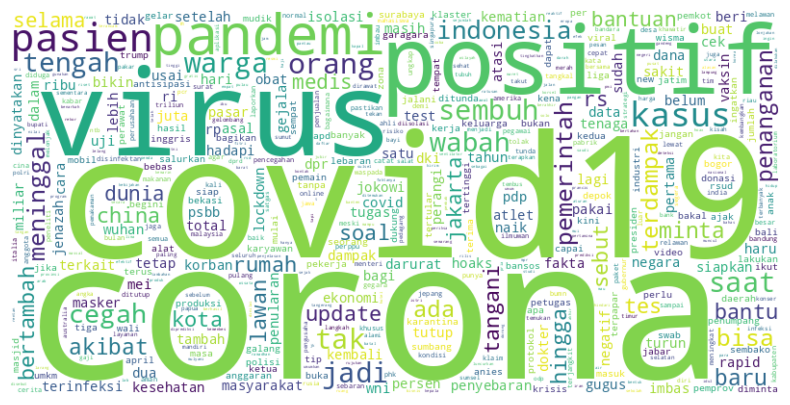

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Pastikan kolom bersih dari NaN
df['title_clean'] = df['title_clean'].fillna('')

# Bersihkan simbol dan tanda baca, bisa disesuaikan
df['title_clean'] = df['title_clean'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Gabungkan jadi satu teks panjang
text = ' '.join(df['title_clean'].tolist())

# Definisikan stopwords (tambahkan kata umum yang tidak perlu)
stopwords = set(STOPWORDS)
stopwords.update(['yang', 'untuk', 'ini', 'dari', 'di', 'dan', 'pada', 'ke', 'akan', 'karena', 'dengan'])

# Buat WordCloud
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400,
    collocations=False  # <-- INI YANG PALING PENTING: untuk mematikan bigram
)

# Generate dari teks
wc.generate(text)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


**FREKUENSI KATA SEBELUM PREPROCESSING**

---



<function matplotlib.pyplot.show(close=None, block=None)>

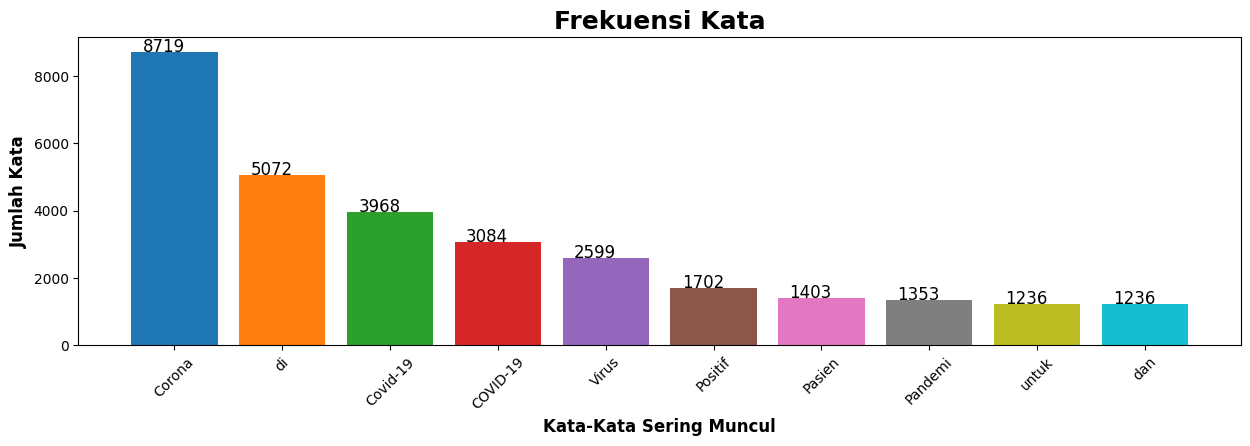

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["title_clean"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(15,4))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show

# **PREPROCESSING**

**CLEANING**

---



In [ ]:
import re
import string
import nltk

#fungsi untuk menghapus emoji
def remove_emoji(tweet):
  if tweet is not None and isinstance(tweet, str):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F" #emoticons
    u"\U0001F300-\U0001F5FF" #simboli dan piktogram
    u"\U0001F680-\U0001F6FF" #transport dan map symbols
    u"\U0001F700-\U0001F77F" #alchemical symbols
    u"\U0001F780-\U0001F7FF" #Geometric Shapes Extended
    u"\U0001F800-\U0001F8FF" # Supplemental Arrows-C
    u"\U0001F900-\U0001F9FF" # Supplemental Symbols and Pictographs
    u"\U0001FA00-\U0001FA6F" # Chess Symbols
    u"\U0001FA70-\U0001FAFF" # Symbols and Pictographs Extended-A
    u"\U0001F1E0-\U0001F1FF" #flags
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
  else:
    return tweet

#fungsi untuk menghapus simbol
def remove_symbol(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet) #menghapus semua simbol
    return tweet

#fungsi menghapus angka
def remove_numbers(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d', '', tweet) #menghapus semua angka
    return tweet

def remove_username(text):
  import re
  return re.sub(r'@[^\s]+', '', text)

df['cleaning'] = df['title_clean'].apply(lambda x: remove_username(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbol(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(21)

,title_clean,sentiment,cleaning,case_folding,tokenize,stopword removal
0,Ronaldo dilaporkan dirawat karena pneumonia,1,Ronaldo dilaporkan dirawat karena pneumonia,ronaldo dilaporkan dirawat karena pneumonia,"[ronaldo, dilaporkan, dirawat, karena, pneumonia]","[ronaldo, dilaporkan, dirawat, pneumonia]"
1,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,0,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,bayi yang tak cukup mendapat asi rentan pneumonia,"[bayi, yang, tak, cukup, mendapat, asi, rentan...","[bayi, asi, rentan, pneumonia]"
2,[HOAKS] Kurma Timur Tengah Mengandung Virus Co...,0,HOAKS Kurma Timur Tengah Mengandung Virus Coro...,hoaks kurma timur tengah mengandung virus coro...,"[hoaks, kurma, timur, tengah, mengandung, viru...","[hoaks, kurma, timur, mengandung, virus, coron..."
3,Hobi Merokok Seperti Pelatih Juventus Risiko P...,0,Hobi Merokok Seperti Pelatih Juventus Risiko P...,hobi merokok seperti pelatih juventus risiko p...,"[hobi, merokok, seperti, pelatih, juventus, ri...","[hobi, merokok, pelatih, juventus, risiko, pne..."
4,Polusi Udara di Cilincing Diperhatikan Setelah...,0,Polusi Udara di Cilincing Diperhatikan Setelah...,polusi udara di cilincing diperhatikan setelah...,"[polusi, udara, di, cilincing, diperhatikan, s...","[polusi, udara, cilincing, diperhatikan, pneum..."
5,Lari virtual jadi media donasi anak penderita ...,0,Lari virtual jadi media donasi anak penderita ...,lari virtual jadi media donasi anak penderita ...,"[lari, virtual, jadi, media, donasi, anak, pen...","[lari, virtual, media, donasi, anak, penderita..."
6,Van der Sar yang Diharap-harapkan Fans MU Itu ...,0,Van der Sar yang Diharapharapkan Fans MU Itu T...,van der sar yang diharapharapkan fans mu itu t...,"[van, der, sar, yang, diharapharapkan, fans, m...","[van, der, sar, diharapharapkan, fans, mu, tek..."
7,Cegah Virus Pneumonia Asal China Masyarakat Di...,0,Cegah Virus Pneumonia Asal China Masyarakat Di...,cegah virus pneumonia asal china masyarakat di...,"[cegah, virus, pneumonia, asal, china, masyara...","[cegah, virus, pneumonia, china, masyarakat, d..."
8,Wabah Pneumonia Misterius di China Ini Imbauan...,0,Wabah Pneumonia Misterius di China Ini Imbauan...,wabah pneumonia misterius di china ini imbauan...,"[wabah, pneumonia, misterius, di, china, ini, ...","[wabah, pneumonia, misterius, china, imbauan, ..."
9,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,0,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,mengenal pneumonia seberapa bahaya penyakit ini,"[mengenal, pneumonia, seberapa, bahaya, penyak...","[mengenal, pneumonia, bahaya, penyakit]"


**CASE FOLDING**

---



In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(21)

,title_clean,sentiment,cleaning,case_folding,tokenize,stopword removal
0,Ronaldo dilaporkan dirawat karena pneumonia,1,Ronaldo dilaporkan dirawat karena pneumonia,ronaldo dilaporkan dirawat karena pneumonia,"[ronaldo, dilaporkan, dirawat, karena, pneumonia]","[ronaldo, dilaporkan, dirawat, pneumonia]"
1,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,0,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,bayi yang tak cukup mendapat asi rentan pneumonia,"[bayi, yang, tak, cukup, mendapat, asi, rentan...","[bayi, asi, rentan, pneumonia]"
2,[HOAKS] Kurma Timur Tengah Mengandung Virus Co...,0,HOAKS Kurma Timur Tengah Mengandung Virus Coro...,hoaks kurma timur tengah mengandung virus coro...,"[hoaks, kurma, timur, tengah, mengandung, viru...","[hoaks, kurma, timur, mengandung, virus, coron..."
3,Hobi Merokok Seperti Pelatih Juventus Risiko P...,0,Hobi Merokok Seperti Pelatih Juventus Risiko P...,hobi merokok seperti pelatih juventus risiko p...,"[hobi, merokok, seperti, pelatih, juventus, ri...","[hobi, merokok, pelatih, juventus, risiko, pne..."
4,Polusi Udara di Cilincing Diperhatikan Setelah...,0,Polusi Udara di Cilincing Diperhatikan Setelah...,polusi udara di cilincing diperhatikan setelah...,"[polusi, udara, di, cilincing, diperhatikan, s...","[polusi, udara, cilincing, diperhatikan, pneum..."
5,Lari virtual jadi media donasi anak penderita ...,0,Lari virtual jadi media donasi anak penderita ...,lari virtual jadi media donasi anak penderita ...,"[lari, virtual, jadi, media, donasi, anak, pen...","[lari, virtual, media, donasi, anak, penderita..."
6,Van der Sar yang Diharap-harapkan Fans MU Itu ...,0,Van der Sar yang Diharapharapkan Fans MU Itu T...,van der sar yang diharapharapkan fans mu itu t...,"[van, der, sar, yang, diharapharapkan, fans, m...","[van, der, sar, diharapharapkan, fans, mu, tek..."
7,Cegah Virus Pneumonia Asal China Masyarakat Di...,0,Cegah Virus Pneumonia Asal China Masyarakat Di...,cegah virus pneumonia asal china masyarakat di...,"[cegah, virus, pneumonia, asal, china, masyara...","[cegah, virus, pneumonia, china, masyarakat, d..."
8,Wabah Pneumonia Misterius di China Ini Imbauan...,0,Wabah Pneumonia Misterius di China Ini Imbauan...,wabah pneumonia misterius di china ini imbauan...,"[wabah, pneumonia, misterius, di, china, ini, ...","[wabah, pneumonia, misterius, china, imbauan, ..."
9,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,0,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,mengenal pneumonia seberapa bahaya penyakit ini,"[mengenal, pneumonia, seberapa, bahaya, penyak...","[mengenal, pneumonia, bahaya, penyakit]"


**TOKENIZATION**

---



In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)
df.head(21)

,title_clean,sentiment,cleaning,case_folding,tokenize,stopword removal
0,Ronaldo dilaporkan dirawat karena pneumonia,1,Ronaldo dilaporkan dirawat karena pneumonia,ronaldo dilaporkan dirawat karena pneumonia,"[ronaldo, dilaporkan, dirawat, karena, pneumonia]","[ronaldo, dilaporkan, dirawat, pneumonia]"
1,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,0,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,bayi yang tak cukup mendapat asi rentan pneumonia,"[bayi, yang, tak, cukup, mendapat, asi, rentan...","[bayi, asi, rentan, pneumonia]"
2,[HOAKS] Kurma Timur Tengah Mengandung Virus Co...,0,HOAKS Kurma Timur Tengah Mengandung Virus Coro...,hoaks kurma timur tengah mengandung virus coro...,"[hoaks, kurma, timur, tengah, mengandung, viru...","[hoaks, kurma, timur, mengandung, virus, coron..."
3,Hobi Merokok Seperti Pelatih Juventus Risiko P...,0,Hobi Merokok Seperti Pelatih Juventus Risiko P...,hobi merokok seperti pelatih juventus risiko p...,"[hobi, merokok, seperti, pelatih, juventus, ri...","[hobi, merokok, pelatih, juventus, risiko, pne..."
4,Polusi Udara di Cilincing Diperhatikan Setelah...,0,Polusi Udara di Cilincing Diperhatikan Setelah...,polusi udara di cilincing diperhatikan setelah...,"[polusi, udara, di, cilincing, diperhatikan, s...","[polusi, udara, cilincing, diperhatikan, pneum..."
5,Lari virtual jadi media donasi anak penderita ...,0,Lari virtual jadi media donasi anak penderita ...,lari virtual jadi media donasi anak penderita ...,"[lari, virtual, jadi, media, donasi, anak, pen...","[lari, virtual, media, donasi, anak, penderita..."
6,Van der Sar yang Diharap-harapkan Fans MU Itu ...,0,Van der Sar yang Diharapharapkan Fans MU Itu T...,van der sar yang diharapharapkan fans mu itu t...,"[van, der, sar, yang, diharapharapkan, fans, m...","[van, der, sar, diharapharapkan, fans, mu, tek..."
7,Cegah Virus Pneumonia Asal China Masyarakat Di...,0,Cegah Virus Pneumonia Asal China Masyarakat Di...,cegah virus pneumonia asal china masyarakat di...,"[cegah, virus, pneumonia, asal, china, masyara...","[cegah, virus, pneumonia, china, masyarakat, d..."
8,Wabah Pneumonia Misterius di China Ini Imbauan...,0,Wabah Pneumonia Misterius di China Ini Imbauan...,wabah pneumonia misterius di china ini imbauan...,"[wabah, pneumonia, misterius, di, china, ini, ...","[wabah, pneumonia, misterius, china, imbauan, ..."
9,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,0,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,mengenal pneumonia seberapa bahaya penyakit ini,"[mengenal, pneumonia, seberapa, bahaya, penyak...","[mengenal, pneumonia, bahaya, penyakit]"


**STOPWORD REMOVAL**

---



In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(21)

,title_clean,sentiment,cleaning,case_folding,tokenize,stopword removal
0,Ronaldo dilaporkan dirawat karena pneumonia,1,Ronaldo dilaporkan dirawat karena pneumonia,ronaldo dilaporkan dirawat karena pneumonia,"[ronaldo, dilaporkan, dirawat, karena, pneumonia]","[ronaldo, dilaporkan, dirawat, pneumonia]"
1,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,0,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,bayi yang tak cukup mendapat asi rentan pneumonia,"[bayi, yang, tak, cukup, mendapat, asi, rentan...","[bayi, asi, rentan, pneumonia]"
2,[HOAKS] Kurma Timur Tengah Mengandung Virus Co...,0,HOAKS Kurma Timur Tengah Mengandung Virus Coro...,hoaks kurma timur tengah mengandung virus coro...,"[hoaks, kurma, timur, tengah, mengandung, viru...","[hoaks, kurma, timur, mengandung, virus, coron..."
3,Hobi Merokok Seperti Pelatih Juventus Risiko P...,0,Hobi Merokok Seperti Pelatih Juventus Risiko P...,hobi merokok seperti pelatih juventus risiko p...,"[hobi, merokok, seperti, pelatih, juventus, ri...","[hobi, merokok, pelatih, juventus, risiko, pne..."
4,Polusi Udara di Cilincing Diperhatikan Setelah...,0,Polusi Udara di Cilincing Diperhatikan Setelah...,polusi udara di cilincing diperhatikan setelah...,"[polusi, udara, di, cilincing, diperhatikan, s...","[polusi, udara, cilincing, diperhatikan, pneum..."
5,Lari virtual jadi media donasi anak penderita ...,0,Lari virtual jadi media donasi anak penderita ...,lari virtual jadi media donasi anak penderita ...,"[lari, virtual, jadi, media, donasi, anak, pen...","[lari, virtual, media, donasi, anak, penderita..."
6,Van der Sar yang Diharap-harapkan Fans MU Itu ...,0,Van der Sar yang Diharapharapkan Fans MU Itu T...,van der sar yang diharapharapkan fans mu itu t...,"[van, der, sar, yang, diharapharapkan, fans, m...","[van, der, sar, diharapharapkan, fans, mu, tek..."
7,Cegah Virus Pneumonia Asal China Masyarakat Di...,0,Cegah Virus Pneumonia Asal China Masyarakat Di...,cegah virus pneumonia asal china masyarakat di...,"[cegah, virus, pneumonia, asal, china, masyara...","[cegah, virus, pneumonia, china, masyarakat, d..."
8,Wabah Pneumonia Misterius di China Ini Imbauan...,0,Wabah Pneumonia Misterius di China Ini Imbauan...,wabah pneumonia misterius di china ini imbauan...,"[wabah, pneumonia, misterius, di, china, ini, ...","[wabah, pneumonia, misterius, china, imbauan, ..."
9,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,0,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,mengenal pneumonia seberapa bahaya penyakit ini,"[mengenal, pneumonia, seberapa, bahaya, penyak...","[mengenal, pneumonia, bahaya, penyakit]"


**STEMMING**

---



In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(21)

,title_clean,sentiment,cleaning,case_folding,tokenize,stopword removal,stemming_data
0,Ronaldo dilaporkan dirawat karena pneumonia,1,Ronaldo dilaporkan dirawat karena pneumonia,ronaldo dilaporkan dirawat karena pneumonia,"[ronaldo, dilaporkan, dirawat, karena, pneumonia]","[ronaldo, dilaporkan, dirawat, pneumonia]",ronaldo lapor rawat pneumonia
1,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,0,Bayi yang Tak Cukup Mendapat ASI Rentan Pneumonia,bayi yang tak cukup mendapat asi rentan pneumonia,"[bayi, yang, tak, cukup, mendapat, asi, rentan...","[bayi, asi, rentan, pneumonia]",bayi asi rentan pneumonia
2,[HOAKS] Kurma Timur Tengah Mengandung Virus Co...,0,HOAKS Kurma Timur Tengah Mengandung Virus Coro...,hoaks kurma timur tengah mengandung virus coro...,"[hoaks, kurma, timur, tengah, mengandung, viru...","[hoaks, kurma, timur, mengandung, virus, coron...",hoaks kurma timur kandung virus corona kelelawar
3,Hobi Merokok Seperti Pelatih Juventus Risiko P...,0,Hobi Merokok Seperti Pelatih Juventus Risiko P...,hobi merokok seperti pelatih juventus risiko p...,"[hobi, merokok, seperti, pelatih, juventus, ri...","[hobi, merokok, pelatih, juventus, risiko, pne...",hobi rokok latih juventus risiko pneumonia kali
4,Polusi Udara di Cilincing Diperhatikan Setelah...,0,Polusi Udara di Cilincing Diperhatikan Setelah...,polusi udara di cilincing diperhatikan setelah...,"[polusi, udara, di, cilincing, diperhatikan, s...","[polusi, udara, cilincing, diperhatikan, pneum...",polusi udara cilincing perhati pneumonia akut
5,Lari virtual jadi media donasi anak penderita ...,0,Lari virtual jadi media donasi anak penderita ...,lari virtual jadi media donasi anak penderita ...,"[lari, virtual, jadi, media, donasi, anak, pen...","[lari, virtual, media, donasi, anak, penderita...",lari virtual media donasi anak derita pneumonia
6,Van der Sar yang Diharap-harapkan Fans MU Itu ...,0,Van der Sar yang Diharapharapkan Fans MU Itu T...,van der sar yang diharapharapkan fans mu itu t...,"[van, der, sar, yang, diharapharapkan, fans, m...","[van, der, sar, diharapharapkan, fans, mu, tek...",van der sar diharapharapkan fans mu teken kont...
7,Cegah Virus Pneumonia Asal China Masyarakat Di...,0,Cegah Virus Pneumonia Asal China Masyarakat Di...,cegah virus pneumonia asal china masyarakat di...,"[cegah, virus, pneumonia, asal, china, masyara...","[cegah, virus, pneumonia, china, masyarakat, d...",cegah virus pneumonia china masyarakat imbau p...
8,Wabah Pneumonia Misterius di China Ini Imbauan...,0,Wabah Pneumonia Misterius di China Ini Imbauan...,wabah pneumonia misterius di china ini imbauan...,"[wabah, pneumonia, misterius, di, china, ini, ...","[wabah, pneumonia, misterius, china, imbauan, ...",wabah pneumonia misterius china imbau menkes awan
9,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,0,Mengenal Pneumonia Seberapa Bahaya Penyakit Ini,mengenal pneumonia seberapa bahaya penyakit ini,"[mengenal, pneumonia, seberapa, bahaya, penyak...","[mengenal, pneumonia, bahaya, penyakit]",kenal pneumonia bahaya sakit


**CEK DATA BERNILAI KOSONG**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16837 entries, 0 to 16840
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_clean       16837 non-null  object
 1   sentiment         16837 non-null  int64 
 2   cleaning          16837 non-null  object
 3   case_folding      16837 non-null  object
 4   tokenize          16837 non-null  object
 5   stopword removal  16837 non-null  object
 6   stemming_data     16837 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16837 entries, 0 to 16840
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_clean       16837 non-null  object
 1   sentiment         16837 non-null  int64 
 2   cleaning          16837 non-null  object
 3   case_folding      16837 non-null  object
 4   tokenize          16837 non-null  object
 5   stopword removal  16837 non-null  object
 6   stemming_data     16837 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
data = data.dropna()
print("\nSetelah menghapus data kosong:")
print(data.isnull().sum())


Setelah menghapus data kosong:
title_clean         0
sentiment           0
cleaning            0
case_folding        0
tokenize            0
stopword removal    0
stemming_data       0
dtype: int64


In [ ]:
data.describe()

,sentiment
count,16837.000000
mean,-0.127457
std,0.479843
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.drop_duplicates(subset ="stemming_data", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16655 entries, 0 to 16840
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title_clean       16655 non-null  object
 1   sentiment         16655 non-null  int64 
 2   cleaning          16655 non-null  object
 3   case_folding      16655 non-null  object
 4   tokenize          16655 non-null  object
 5   stopword removal  16655 non-null  object
 6   stemming_data     16655 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


**WORDCLOUD SETELAH PREPROCESSING**

---



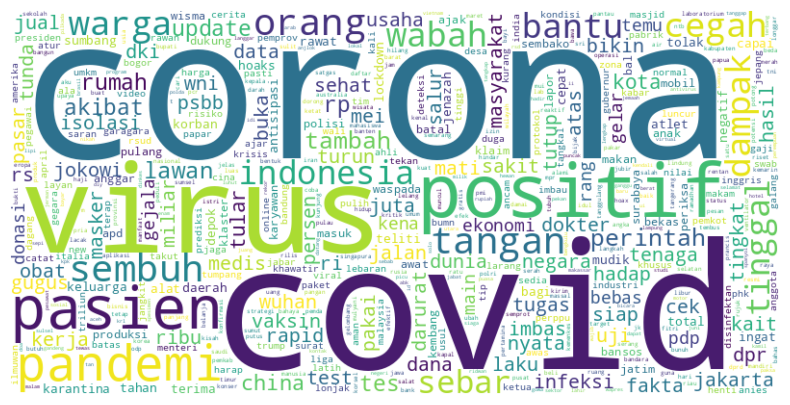

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re

# Pastikan kolom 'stemming_data' tidak ada NaN
data['stemming_data'] = data['stemming_data'].fillna('')

# Bersihkan teks (hilangkan simbol, ubah ke huruf kecil)
data['stemming_data'] = data['stemming_data'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Menggabungkan teks dari kolom 'stemming_data'
text = ' '.join(data['stemming_data'].astype(str).tolist())

# Definisikan stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https','co','rt','...','amp','lu','deh','fyp','ya','gue','kak','yg'])

# Buat WordCloud unigram (collocations dimatikan)
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400,
    collocations=False  # Matikan bigram
)

# Generate dari teks
wc.generate(text)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


**FREKUENSI KATA SETELAH PREPROCESSING**

---



<function matplotlib.pyplot.show(close=None, block=None)>

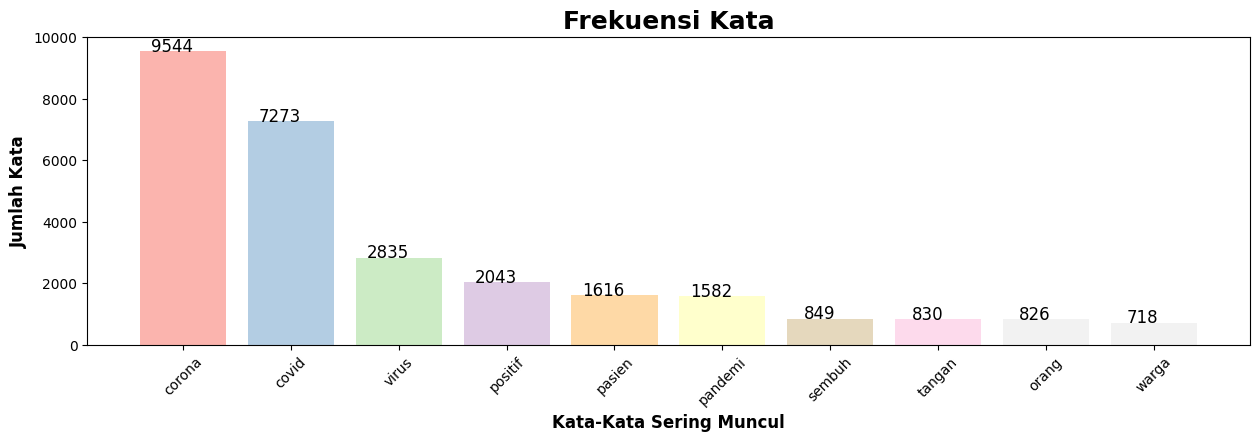

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

text = " ".join(data["stemming_data"])

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT','...','amp','lu','deh','fyp','ya','gue','kak','yg'])

tokens = [word for word in text.split() if word not in stopwords]
word_counts = Counter (tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
#menggunakan palet warna lebih soft
colors = plt.cm.Pastel1(range(len(word)))

#membuat plot
plt.figure(figsize=(15,4))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show

In [ ]:
df.to_csv("inacoved-preprocessing.csv", index=False, encoding="utf-8")


# **FEATURE EXTRACTION: TF-IDF**

**DISTRIBUSI SENTIMEN**

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data dari CSV
df = pd.read_csv('inacoved-preprocessing.csv')

# Cek distribusi sentimen
print(df['sentiment'].value_counts())


sentiment
 0    12658
-1     3030
 1      967
Name: count, dtype: int64


<ipython-input-2-1669224836>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="viridis")


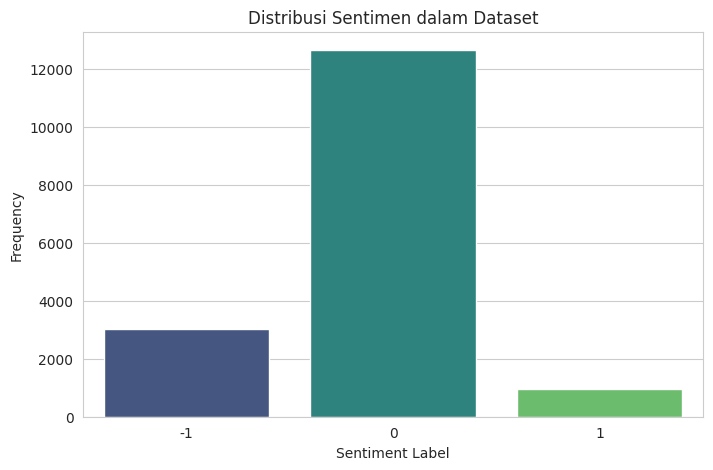

In [2]:
# Set style seaborn
sns.set_style("whitegrid")

# Plot distribusi sentimen
plt.figure(figsize=(8,5))
sns.countplot(x=df['sentiment'], palette="viridis")

# Tambahkan label
plt.xlabel("Sentiment Label")
plt.ylabel("Frequency")
plt.title("Distribusi Sentimen dalam Dataset")

# Tampilkan grafik
plt.show()


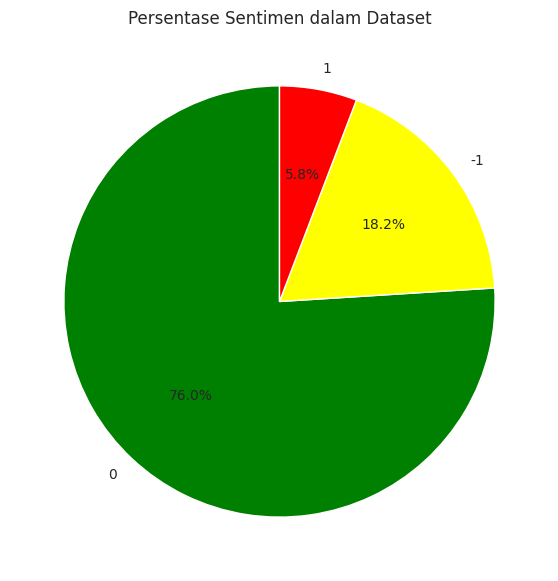

In [3]:
# Hitung persentase masing-masing sentimen
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'yellow', 'red'], startangle=90)
plt.title("Persentase Sentimen dalam Dataset")

# Tampilkan grafik
plt.show()


**TF-IDF**

---



In [9]:
import pandas as pd
import pandas as pd
import numpy as np
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Load dataset preprocessing
print("Loading preprocessed data...")
df = pd.read_csv("inacoved-deployment.csv")

# 2. Pisahkan fitur (teks) dan label (sentimen)
X = df["stemming_data"]  # Kolom teks yang sudah dipreprocess
y = df["sentiment"]  # Kolom sentimen

#membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#TF-IDF Vektorisasi dengan bigram
vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Menyeimbangkan data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

#melatih model rf
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf_resampled, y_train_resampled)

# memprediksi data uji
y_pred = rf_model.predict(X_test_tfidf)

# evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Negatif", "Netral", "Positif"])

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# simpan model dan vercotizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
      pickle.dump(vectorizer, vectorizer_file)
with open("rf_sentiment_model.pkl", "wb") as vectorizer_file:
      pickle.dump(rf_model, model_file)



Loading preprocessed data...
Accuracy: 0.9204443110177124
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.84      0.81      0.82       606
      Netral       0.95      0.97      0.96      2532
     Positif       0.82      0.67      0.74       193

    accuracy                           0.92      3331
   macro avg       0.87      0.82      0.84      3331
weighted avg       0.92      0.92      0.92      3331



NameError: name 'model_file' is not defined

In [11]:
import pandas as pd
import pandas as pd
import numpy as np
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Load dataset preprocessing
print("Loading preprocessed data...")
df = pd.read_csv("inacoved-deployment.csv")

# 2. Pisahkan fitur (teks) dan label (sentimen)
X = df["stemming_data"]  # Kolom teks yang sudah dipreprocess
y = df["sentiment"]  # Kolom sentimen

#membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#TF-IDF Vektorisasi dengan bigram
vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Menyeimbangkan data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# simpan model dan vercotizer
with open("tfidf_vectorizer.pkl", "wb") as vectorizer_file:
      pickle.dump(vectorizer, vectorizer_file)

Loading preprocessed data...
